In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
pathname = 'audio/2.mp3'
y, sr = librosa.load(pathname,
                     sr=44100,
                     duration=5,
                     offset=35)

In [4]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)

In [6]:
plt.figure(figsize=(6, 4))


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

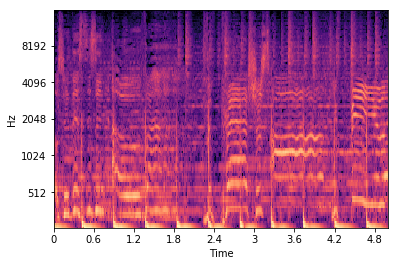

In [7]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)

In [8]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [9]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [10]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

In [11]:
onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

In [12]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(figsize=(6, 6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [13]:
frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

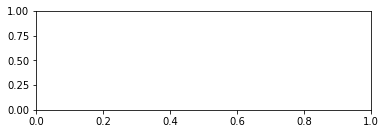

In [14]:
ax = plt.subplot(2, 1, 2)

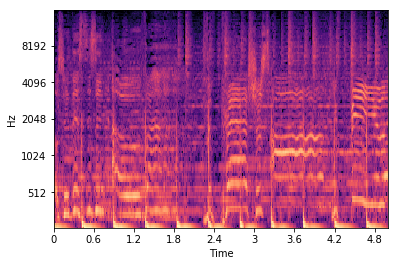

In [15]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)

(0, 5.0)

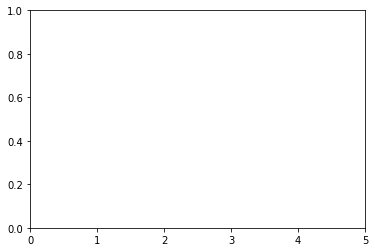

In [16]:
plt.xlim([0, 5.0])


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

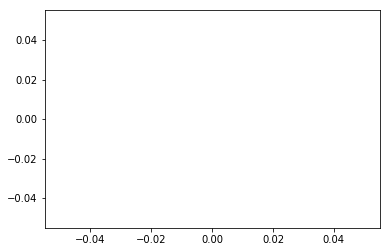

In [17]:
plt.axis('tight')


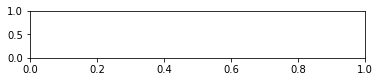

In [18]:
plt.subplot(4, 1, 1, sharex=ax)


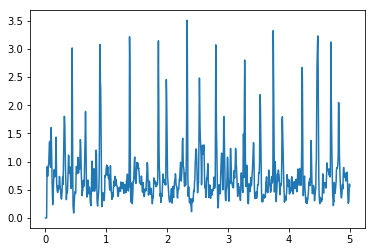

In [19]:
plt.plot(frame_time, odf_default, label='Spectral flux')


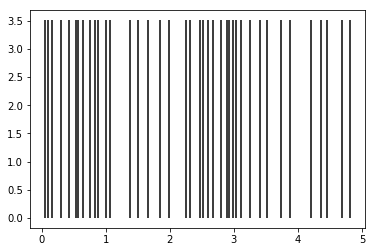

In [20]:
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')


(0, 5.0)

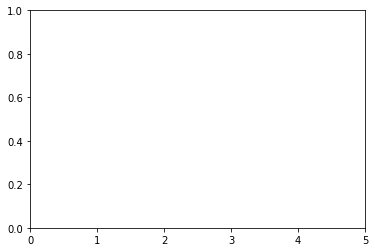

In [21]:
plt.xlim([0, 5.0])


No handles with labels found to put in legend.


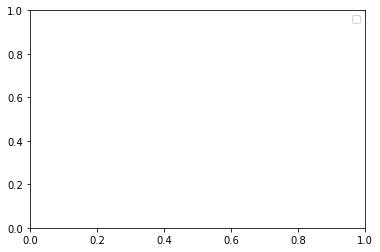

In [22]:
plt.legend()


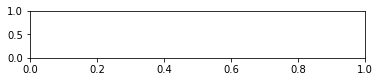

In [23]:
plt.subplot(4, 1, 2, sharex=ax)


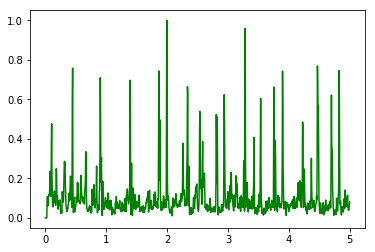

In [24]:
plt.plot(frame_time, odf_sf, color='g', label='Superflux')


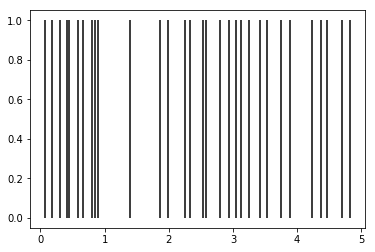

In [25]:
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')


(0, 5.0)

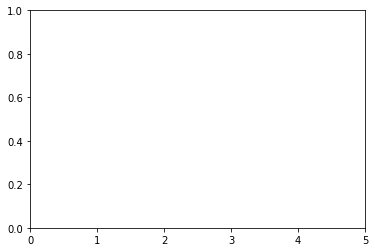

In [26]:
plt.xlim([0, 5.0])


No handles with labels found to put in legend.


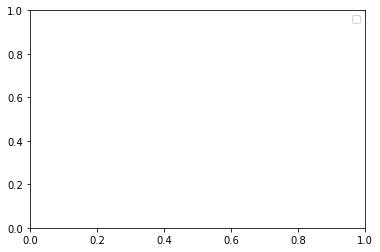

In [27]:
plt.legend()


In [28]:
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [29]:
plt.show()
